# 강사님 생각

## 좋은 회사란??  
* 세미나를 많이 하는 회사라고 생각한다.  
* 이는, 계속 성장하려는 회사라는 것이고  
* 직원들이 공부할 수 있게 하는 회사라는 것이다.  
* 규모의 문제가 아님  
* 계속 외부 인재를 통한 인사이트 업그레이드는 불가능하다.  
* 내부 인재들에게 성장하게 하고, 이를 세미나를 통해 발표하는 것. 아주 바람직하다.  

# 텍스트 딥러닝

* 텍스트 딥러닝에서 알아둘 개념 : RNN, LSTM, GRU
* LSTM, GRU는 RNN의 파생형
* Seq2seq : 문장 to 문장. RNN을 사용하는 개념이다. 이를 통해 번역이나 챗봇, 요약 등이 가능하다.  
* 그런데 하다 보면, RNN이 필요가 없고 Transformer 구조로 간다. RNN이 아닌, Attention의 개념으로 가게 된다.??? 이게 무엇???  
* 그러면 우리가 매번 학습을 시켜야 하나? 그럴 필요가 없음. 이에 pre-trained(fine-tuning) 사전학습 된 것을 전이학습으로 사용하는 것으로 충분하게 된다.  
* 여기서 나오는 것들이 BERT, GPT(챗 GPT로 알려진) 것들이다.  

* speach 음성인식 쪽은 이미 많이 개발이 되었고, 더이상 더 좋은 기술이 필요가 없을 정도이다. 라고 강사님은 본다.  
* 그래서 굳이 speach를 진행해야할까... 라는 생각이 있다.  

## RNN으로 가사 분석해보기

In [24]:
text = '''저 별을 따다가 니 귀에 걸어주고파
저 달 따다가 니 목에 걸어주고파
세상 모든 좋은 것만 해주고 싶은
이런 내 맘을 그댄 아나요.'''

In [25]:
# 학습 목표
# 위 텍스트를 학습시켰을 때

'''
저? -> '별을' 을 출력
저 별을? -> '따다가' 를 출력
'''

# 이런 식으로, 운을 띄웠을 때 그 다음 문장을 예측하거나 추천할 수 있는 것.

"\n저? -> '별을' 을 출력\n저 별을? -> '따다가' 를 출력\n"

In [26]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [27]:
# 단어 인덱싱
tok = Tokenizer()
tok.fit_on_texts([text])
tok.word_index

{'저': 1,
 '따다가': 2,
 '니': 3,
 '걸어주고파': 4,
 '별을': 5,
 '귀에': 6,
 '달': 7,
 '목에': 8,
 '세상': 9,
 '모든': 10,
 '좋은': 11,
 '것만': 12,
 '해주고': 13,
 '싶은': 14,
 '이런': 15,
 '내': 16,
 '맘을': 17,
 '그댄': 18,
 '아나요': 19}

In [28]:
# vocab size
vocab_size = len(tok.word_index) + 1 # +1 : zero padding용
vocab_size

20

In [59]:
# 문장으로 나눈 후
# 각 문장이 전개되는 순서가 담긴 리스트 만들기

seq_list = []

for sentence in text.split('\n'):
    res = tok.texts_to_sequences([sentence])[0]
    for i in range(1, len(res)):
        seq = res[:i+1]
        seq_list.append(seq)

seq_list

[[1, 5],
 [1, 5, 2],
 [1, 5, 2, 3],
 [1, 5, 2, 3, 6],
 [1, 5, 2, 3, 6, 4],
 [1, 7],
 [1, 7, 2],
 [1, 7, 2, 3],
 [1, 7, 2, 3, 8],
 [1, 7, 2, 3, 8, 4],
 [9, 10],
 [9, 10, 11],
 [9, 10, 11, 12],
 [9, 10, 11, 12, 13],
 [9, 10, 11, 12, 13, 14],
 [15, 16],
 [15, 16, 17],
 [15, 16, 17, 18],
 [15, 16, 17, 18, 19]]

* 위 코드 결과값 설명

[1, 5], 저 별을  
[1, 5, 2], 저 별을 따다가  
[1, 5, 2, 3], 저 별을 따다가 니  
[1, 5, 2, 3, 6], 저 별을 따다가 니 귀에  
[1, 5, 2, 3, 6, 4], 저 별을 따다가 니 귀에 걸어주고파  
...

In [60]:
# zero_padding 진행

max_len = max(len(sent) for sent in seq_list)
max_len # 결과값 : 6

seq_padded = pad_sequences(seq_list, maxlen=max_len)
seq_padded # 일반적으로 패딩 0은 값의 앞쪽에 위치한다.

array([[ 0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  1,  5,  2],
       [ 0,  0,  1,  5,  2,  3],
       [ 0,  1,  5,  2,  3,  6],
       [ 1,  5,  2,  3,  6,  4],
       [ 0,  0,  0,  0,  1,  7],
       [ 0,  0,  0,  1,  7,  2],
       [ 0,  0,  1,  7,  2,  3],
       [ 0,  1,  7,  2,  3,  8],
       [ 1,  7,  2,  3,  8,  4],
       [ 0,  0,  0,  0,  9, 10],
       [ 0,  0,  0,  9, 10, 11],
       [ 0,  0,  9, 10, 11, 12],
       [ 0,  9, 10, 11, 12, 13],
       [ 9, 10, 11, 12, 13, 14],
       [ 0,  0,  0,  0, 15, 16],
       [ 0,  0,  0, 15, 16, 17],
       [ 0,  0, 15, 16, 17, 18],
       [ 0, 15, 16, 17, 18, 19]])

In [69]:
# X와 y 나누기

X = seq_padded[:, :-1] # X는 각 리스트에서 최종 단어 하나를 뺀 전부
y = seq_padded[:, -1] # y는 각 리스트의 가장 마지막 값

X.shape

(19, 5)

In [68]:
# y 원핫인코딩
y_hot = to_categorical(y, num_classes = vocab_size)
y_hot.shape

(19, 20)

In [105]:
# 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

model = Sequential([
    Embedding(vocab_size, 10), # 이만큼의 vocab_size가 들어갈거야, 그리고 각 단어들을 10개 차원으로 나눠서 (분석?) 해줘
    SimpleRNN(32),
    Dense(vocab_size, activation='softmax')]) # 원핫인코딩이므로 소프트맥스

In [106]:
# 모델 둘러보기
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 10)          200       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                1376      
                                                                 
 dense_7 (Dense)             (None, 20)                660       
                                                                 
Total params: 2,236
Trainable params: 2,236
Non-trainable params: 0
_________________________________________________________________


In [110]:
#### 모델 컴파일
model.compile(loss = 'categorical_crossentropy', # 로스는 어떻게 할거냐
              optimizer = 'adam', # 로스는 어떻게 찾아갈거냐
              metrics = ['accuracy']) # 성능 측정은 어떻게 할 거냐

# 학습
history = model.fit(X, y_hot, epochs = 150, verbose = 1)

## label_encoding : sparse_categorical_crossentropy / 0.8947
## one-hot_encoding : categorical_crossentropy / 0.9474

Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.4326 - accuracy: 0.9474
Epoch 2/150
1/1 [==============================] - 0s 14ms/step - loss: 0.4248 - accuracy: 0.9474
Epoch 3/150
1/1 [==============================] - 0s 15ms/step - loss: 0.4178 - accuracy: 0.9474
Epoch 4/150
1/1 [==============================] - 0s 14ms/step - loss: 0.4100 - accuracy: 0.9474
Epoch 5/150
1/1 [==============================] - 0s 13ms/step - loss: 0.4032 - accuracy: 0.9474
Epoch 6/150
1/1 [==============================] - 0s 11ms/step - loss: 0.3962 - accuracy: 0.9474
Epoch 7/150
1/1 [==============================] - 0s 10ms/step - loss: 0.3891 - accuracy: 0.9474
Epoch 8/150
1/1 [==============================] - 0s 10ms/step - loss: 0.3825 - accuracy: 0.9474
Epoch 9/150
1/1 [==============================] - 0s 11ms/step - loss: 0.3760 - accuracy: 0.9474
Epoch 10/150
1/1 [==============================] - 0s 11ms/step - loss: 0.3693 - accuracy: 0.9474
Epoch 11/150
1/1 [===

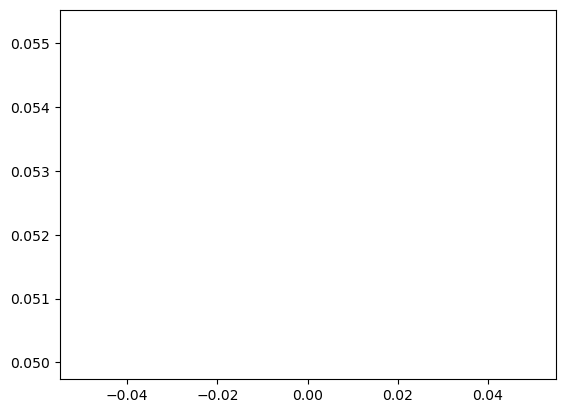

In [108]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [123]:
# 예측하고 싶은 텍스트 인코딩
start_text = '이런 내 맘을 그댄'
encoded = tok.texts_to_sequences([start_text])
encoded_dic = { y : x for x, y in zip(start_text.split(), encoded[0])}


# 예측하고 싶은 텍스트 패딩
padded = pad_sequences(encoded, maxlen = max_len)
padded

## 패딩하는 이유 : 다시 한 번 상기해보자면, 입력값의 모양이 일정해야 분석이 가능하기 때문

{15: '이런', 16: '내', 17: '맘을', 18: '그댄'}

In [124]:
# 예측
res = model.predict(padded, verbose=1)
tok.word_index.get(res.argmax())

1/1 [==============================] - 0s 52ms/step


In [ ]:
# 마무리
## 임베딩
## RNN을 이용한 학습 : RNN는 Sequence, 흐름이 있는 것을 분석하는 것에 적합하다.
## Dense 학습 후 출력


## 반댓말, 동의어 등 유사도 찾기는 : word2vec

# 시계열 분석

## 삼각함수를 이용한 시계열 분석 흐름 보기 ???

* 이해보다는 일단 눈에 익히는 걸 목표로 수업 진행  

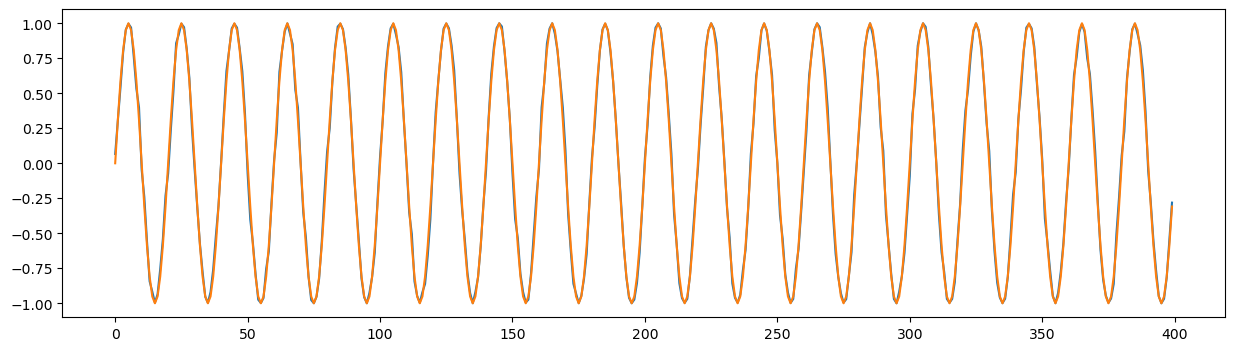

In [151]:
steps_per_cycle  = 20
number_of_cycles = 176
noise_factor = 0.1
plot_num_cycles = 20

seq_len = steps_per_cycle * number_of_cycles
t = np.arange(seq_len)
sin_t_noisy = np.sin(2*np.pi/steps_per_cycle*t + noise_factor * np.random.uniform(-1.0, 1.0, seq_len))
sin_t_clean = np.sin(2*np.pi/steps_per_cycle*t)    
    
upto = plot_num_cycles * steps_per_cycle
fig = plt.figure(figsize = (15, 4))
plt.plot(t[:upto], sin_t_noisy[:upto], label='noisy')
plt.plot(t[:upto], sin_t_clean[:upto], label='clean')
plt.show()

## 시계열자료 패킹

* 시계열 자료는 이러이러하게 생겼으니
* 시계열 자료의 데이터셋 준비는 이러이러하게 하면 된다~ 라는 내용인 듯

In [ ]:
def pack_truncated_data(data, num_prev = 100):
    X, Y = [], []
    for i in range(len(data) - num_prev):
        X.append(data[i:i+num_prev])
        Y.append(data[i+num_prev])
    
    X = np.array(X)[:, :, np.newaxis] #[[2,3]]  keras가 요구하는 형태로
    Y = np.array(Y)[:, np.newaxis]    #[[4]]  keras가 요구하는 형태로
    return X, Y

## 시계열자료 데이터셋 준비

In [152]:
truncated_seq_len = 10
test_split = 0.25

data = sin_t_noisy
data_len = data.shape[0]
num_train = int(data_len*(1-test_split))

train_data = data[:num_train]
test_data = data[num_train:]

X_train, y_train = pack_truncated_data(train_data, truncated_seq_len)
X_test, y_test = pack_truncated_data(train_data, truncated_seq_len)

data_len, X_train.shape, y_train.shape, X_test.shape, y_test.shape

(3520, (2630, 10, 1), (2630, 1), (2630, 10, 1), (2630, 1))

## 모델 선언 및 학습

In [175]:
def define_model(truncated_seq_len):
    import tensorflow as tf
    from keras.models import Sequential
    from keras.layers import SimpleRNN, Dense
    import numpy as np
    
    input_dimension = 1 # input 차원. 우선 1개로 지정
    output_dimension = 1 # output 차원. 우선 1개로 지정
    hidden_dimension = 1 # 은닉층 차원수. 우선 1개로 지정
    
    model = Sequential(name='SEQ_RNN_1')
    model.add(SimpleRNN(input_shape = (truncated_seq_len, input_dimension),
                        units = hidden_dimension,
                        return_sequences = False, name='hidden_layer'))
    model.add(Dense(output_dimension, name='output_layer'))
    
    my_adam = tf.keras.optimizers.Adam(learning_rate=1e-3) # 오 이렇게 쓸 수도 있구나! 1e-3
    
    model.compile(loss = 'mse', # 다음값을 예측하는 것이기 때문에 회귀와 비슷하다. 회귀에 어울리는 mse
                  optimizer = 'adam')
    
    return model

In [176]:
model = define_model(X_train.shape[1]) # 10개
model.summary()

Model: "SEQ_RNN_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (SimpleRNN)    (None, 1)                 3         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [177]:
history = model.fit(X_train, y_train, batch_size = 600, epochs = 1000,
                    verbose = 0, validation_split = 5e-2) #0.05

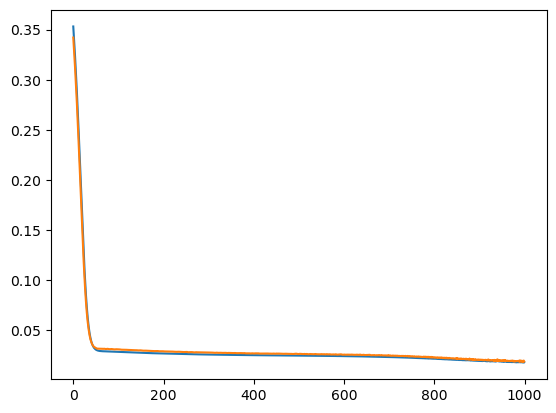

In [178]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 예측

4/4 [==============================] - 0s 5ms/step


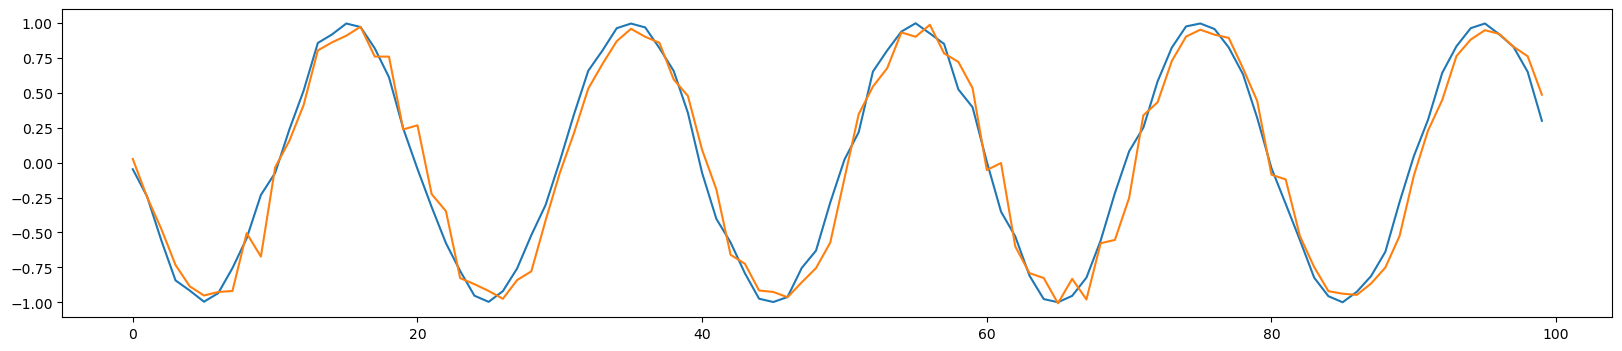

In [179]:
y_predict = model.predict(X_test[:100])
plt.figure(figsize = (20, 4))
plt.plot(y_test[:100], label = 'y_real')
plt.plot(y_predict[:100], label = 'y_prediction')

## 뭘 할 수 있을까?

* 주식 예측  --> 가능 할까??  
* 텍스트 분석  

====================================

* 과연 이걸로 예측이라는 게 가능할까?  
* 주식은 시점에 대해서만 비례하는 게 아니라, 시점 외 다른 변수들이 너무 많다.. 고 생각함  
* 위와 같은 예측은 참고만 하는 것  
* 다른 정량적인 영향 변수들을 충분히 반영했다고 해도 마찬가지이다.  
* 뉴턴이 주식에 대해 이야기한 것과 같이, 정성적인 부분들도 많을 것이다.  
* + 선생님 : 예측이 늦는다. 고로 예측이 아니다.  
* 인공지능은.. 뻔한 것, 즉 사람 쓰면 되는 걸 기계에게 맡기는 것  

====================================

* 로또는 또 다른데..  
* 로또는 독립시행이라 분석이 불가  